In [19]:
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.model_selection import KFold,cross_val_score

In [62]:
X, y = make_classification (n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [68]:
Model = LogisticRegression()


In [66]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(Model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))


Accuracy: 0.835 (0.007)


In [69]:
from sklearn.model_selection import LeaveOneOut

cv=LeaveOneOut()
cv.get_n_splits(X)
# cv = KFold(n_splits=len(X), random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(Model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.836 (0.370)


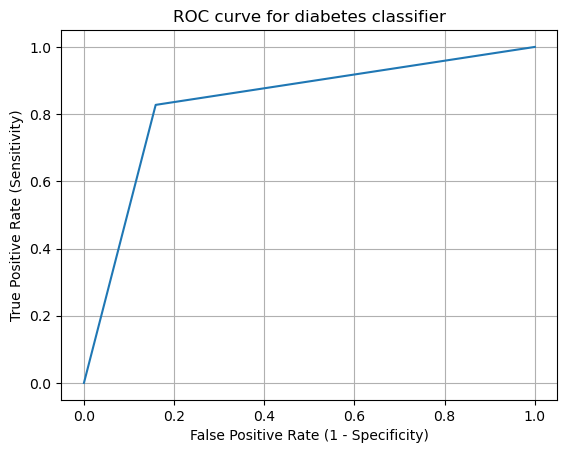

0.8342120628470836


In [70]:
from matplotlib import pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(Model,X,y)
fpr,tpr,thresholds = roc_curve(y, y_pred)
AUC = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(AUC)

In [79]:
# -*- coding: UTF-8 -*-
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score


cancer = load_breast_cancer()
x = cancer.data   # 加载数据 每个数据 20个特征值
y = cancer.target  #加载标签集

# 使用 lr 类，初始化模型
clf = LogisticRegression()

# 使用训练数据来学习（拟合），不需要返回值，训练的结果都在对象内部变量中
clf.fit(x, y)


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('KFold Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))


#cv=LeaveOneOut()
#cv.get_n_splits(x)
cv = KFold(n_splits=len(x), random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(Model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('LeaveOneOt Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))



d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KFold Accuracy: 0.944 (0.038)
LeaveOneOt Accuracy: 0.946 (0.227)


d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

AUC= 0.9397825167802971


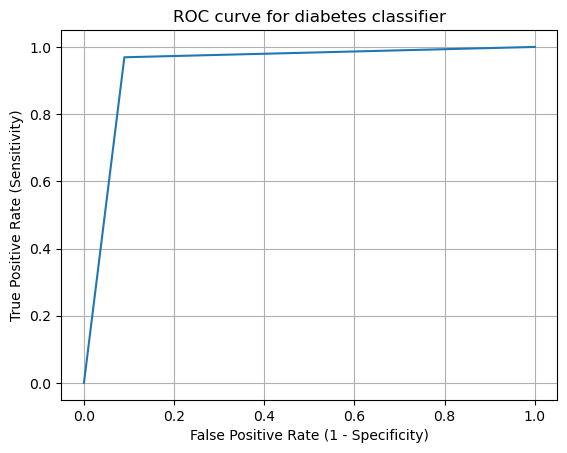

In [82]:
from matplotlib import pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(clf,x,y)
fpr,tpr,thresholds = roc_curve(y, y_pred)
AUC = auc(fpr, tpr)
print("AUC=",AUC)
plt.plot(fpr, tpr)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()